# Tu primer random forest con scikit-learn

In [67]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [68]:
#Cargamos dataset a utilizar
df = pd.read_csv('/Users/andressanchez/Desktop/Data Scientist/Decision Trees and Random Forests Course with Python and scikit-learn/diabetes.csv')


## Exploración de datos

In [69]:
#Visualizacion del dataframe
df.sample(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100,88,60,110,46.8,0.962,31,0
748,3,187,70,22,200,36.4,0.408,36,1
595,0,188,82,14,185,32.0,0.682,22,1
203,2,99,70,16,44,20.4,0.235,27,0
558,11,103,68,40,0,46.2,0.126,42,0
461,1,71,62,0,0,21.8,0.416,26,0
711,5,126,78,27,22,29.6,0.439,40,0
518,13,76,60,0,0,32.8,0.180,41,0
254,12,92,62,7,258,27.6,0.926,44,1
293,1,128,48,45,194,40.5,0.613,24,1


In [70]:
#Renombramos las columnas


In [71]:
#Verificacion de datos
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [72]:
#Analizamos el shape del objeto
df.shape


(768, 9)

In [73]:
#Visualizamos los tipos de datos
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [74]:
#Separamos en X e y
X = df.drop('Outcome', axis=1)
y = df['Outcome']




In [75]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [76]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier


#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=60)


In [77]:
#Entrenamiento
random_forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60)

In [78]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)


## Evaluación del modelo

In [79]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score


#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy en Train:', train_accuracy)
print('Accuracy en Test:', test_accuracy)

Accuracy en Train: 1.0
Accuracy en Test: 0.6926406926406926


In [80]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {'feature': list(X.columns), 'importance': random_forest.feature_importances_}).sort_values('importance', ascending=False)

# Mostrar
feature_importances_df


,feature,importance
1,Glucose,0.290012
5,BMI,0.149961
7,Age,0.126507
6,DiabetesPedigreeFunction,0.112186
2,BloodPressure,0.097440
0,Pregnancies,0.092101
3,SkinThickness,0.067210
4,Insulin,0.064584


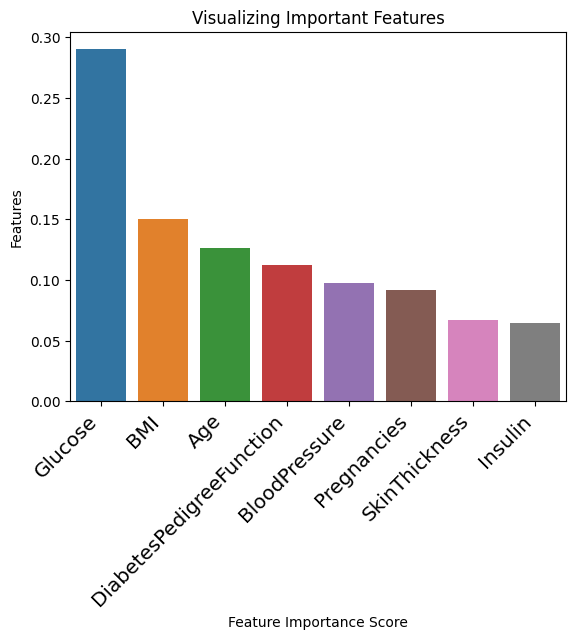

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.show()

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**